In [ ]:
%reload_ext autoreload
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns


In [ ]:
import random

def sgd_mean_var(X, burn_in, sample_intv, learning_rate, n_sample):
    n, p = X.shape
    mean = np.zeros((p,))
    all_mean = []
    nrun = burn_in + sample_intv * n_sample + 10
    for irun in xrange(nrun):
        ind = random.randrange(0, n)
        mean = (1 - learning_rate) * mean + learning_rate * X[ind, :].ravel()
        if irun > burn_in and irun % (sample_intv) == 1:
            all_mean.append(mean.tolist())
    return all_mean

In [6]:
X = np.random.multivariate_normal([0, 0], [[1, -.8], [-.8, 1]], 300)

<IPython.core.display.Javascript object>


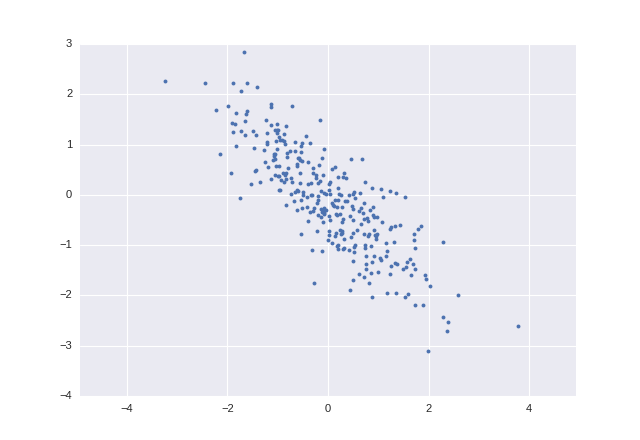

In [57]:
plt.figure()
plt.plot(X[:,0], X[:, 1], '.')
plt.axes().set_aspect('equal', 'datalim')


<IPython.core.display.Javascript object>


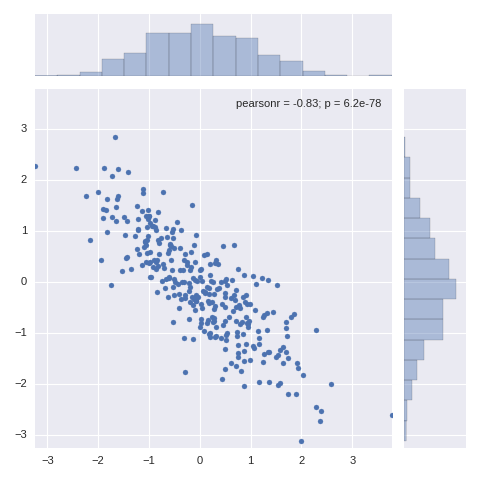

In [62]:
sns.jointplot(X[:,0], X[:, 1], kind='scatter', xlim=[np.min(X[:]), np.max(X[:])], ylim=[np.min(X[:]), np.max(X[:])])

In [51]:
burn_in = 1000
sample_intv = 2
learning_rate = 0.01 #1.0
n_smaple = 300
mean_all = sgd_mean_var(X, burn_in, sample_intv, learning_rate, n_smaple)

In [52]:
mean_all = np.array(mean_all)

print np.mean(mean_all, axis=0)

print np.cov(mean_all.T)

print np.cov(mean_all.T) / (learning_rate /2)

[ 0.04691562 -0.14352362]
[[ 0.00420228 -0.00176642]
 [-0.00176642  0.00219028]]
[[ 0.84045556 -0.35328349]
 [-0.35328349  0.43805607]]


<IPython.core.display.Javascript object>


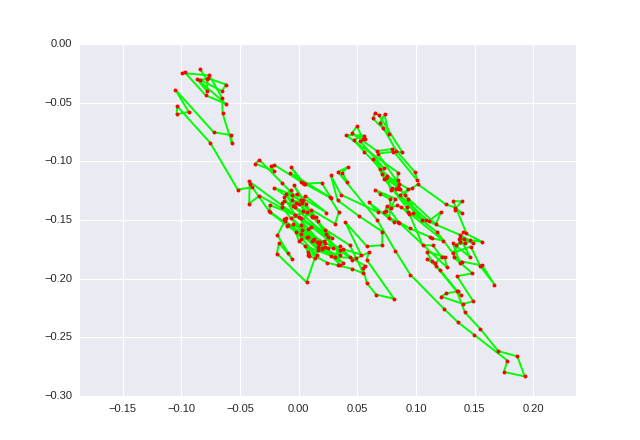

In [56]:
plt.figure()
plt.plot(mean_all[:,0], mean_all[:, 1], c=[0,1,0], linestyle='-', marker='.', 
        markeredgecolor='r', markerfacecolor='r')
plt.axes().set_aspect('equal', 'datalim')


<IPython.core.display.Javascript object>


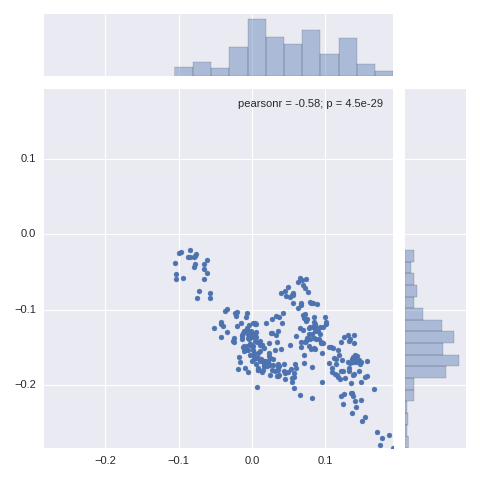

In [63]:
sns.jointplot(mean_all[:,0], mean_all[:, 1], kind='scatter',
             xlim=[np.min(mean_all[:]), np.max(mean_all[:])], ylim=[np.min(mean_all[:]), np.max(mean_all[:])])
